# **Exercício computacional (baseado no exercício 5.11) do livro Du & Swamy (2019).**

Seja a função y = φ(x1 + 2x2) + 0,5(x1 − x2)**2 + 0,5Ni;

onde φ(·) é a função sigmoidal logística;

N é um número sorteado da distribuição normal padrão;

i= 1,2;

e 0<=x1,x2<=1.

Pede-se:


(a) Gere, informe e plote 200 pontos (140 pontos para treinamento, 30 pontos
para validaçao e 30 pontos para testes) pertencentes a duas classes diferentes,
metade para cada uma das distribuições normais;
# **GERAÇÃO DE DADOS**

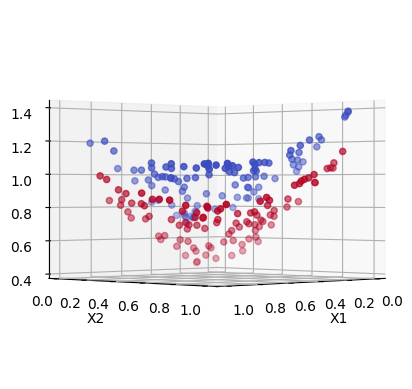

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função logística (sigmoidal)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Gerar pontos pertencentes às duas classes diferentes
def generate_points(num_points, c):
    x = np.random.rand(num_points, 2)  # Gerar pontos x1 e x2 entre 0 e 1
    N = np.random.randn()  # Número sorteado da distribuição normal padrão

    y_values = []
    for j in x:
        y = calculate_y(j[0], j[1], N)
        y_values.append(y)
    y_values = np.array(y_values)
    c_values = np.full((num_points, 1), c)

    return np.concatenate((x, y_values.reshape(-1, 1), c_values), axis=1)

# Função para calcular y conforme especificado
def calculate_y(x1, x2, N):
    return sigmoid(x1 + 2*x2) + 0.5*(x1 - x2)**2 + 0.5*N

# Gerar os pontos de dados
c1 = generate_points(100, 1)
c2 = generate_points(100, 2)

# Juntar os pontos de ambas as classes
data = np.concatenate((c1, c2), axis=0)

# Plotar os pontos em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dividir os pontos em x, y e z
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Colorir os pontos de acordo com a classe
ax.scatter(x, y, z, c=data[:, 3], cmap='coolwarm')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

ax.view_init(elev=0, azim=45)

plt.show()

Na imagem acima os pontos representam X1, X2, Y

gerados usando Ni (número sorteado da distribuição normal padrão)

onde os vermelhos foram gerados por N1 e os azuis por N2

In [25]:
from sklearn.model_selection import train_test_split

# Separar os dados em features (x) e rótulos (y)
x = data[:, :-1]  # Todas as colunas, exceto a última
y = data[:, -1]   # Última coluna

# Dividir os dados em treino, teste e validação
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=60, random_state=42)  # 140 para treino, 60 para teste e validação
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)  # 30 para teste, 30 para validação

# Verificar os tamanhos dos conjuntos de dados
print("Tamanho de x_train:", x_train.shape)
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de x_valid:", x_valid.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)
print("Tamanho de y_valid:", y_valid.shape)s

Tamanho de x_train: (140, 3)
Tamanho de x_test: (30, 3)
Tamanho de x_valid: (30, 3)
Tamanho de y_train: (140,)
Tamanho de y_test: (30,)
Tamanho de y_valid: (30,)


Separação dos dados onde

**x_train|y_train:** entrada|saída do conjunto de treino

**x_valid|y_valid:** entrada|saída do conjunto de validação

**x_test|y_test:** entrada|saída do conjunto de teste

(c) Escreva um programa implementando o RBF de três camadas e rode para
determinar a acurácia;

# **RBF**


Acurácia do modelo RBF no conjunto de treino: 1.0
Acurácia do modelo RBF no conjunto de testes: 1.0
Pesos por função de base radial:
Função de Base Radial 1: 276.30585937910257
Função de Base Radial 2: -841.7881136447756
Função de Base Radial 3: 221.9727105819733
Função de Base Radial 4: 615.8943886265517
Função de Base Radial 5: -174.45226375613333
Função de Base Radial 6: -88.51947410208163


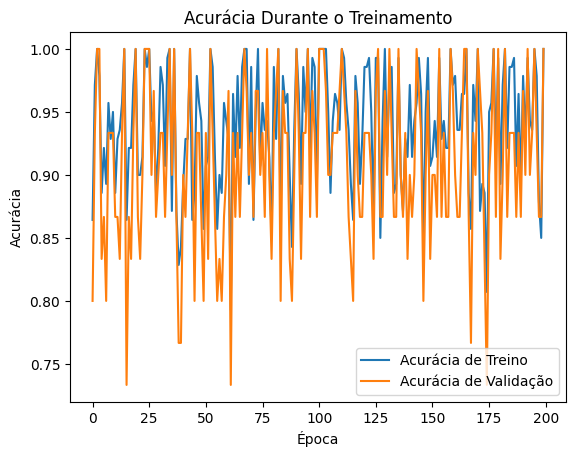

In [23]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Classe do modelo RBF para ser compatível com GridSearchCV
class RBFModel(BaseEstimator):
    def __init__(self, num_centers=10, width=1.0):
        self.num_centers = num_centers
        self.width = width

    # Função para calcular a matriz de design da camada oculta usando a função de base radial (RBF)
    def calculate_design_matrix(self, X, centers):
        return np.exp(-cdist(X, centers) ** 2 / (2 * self.width ** 2))

    def fit(self, x_train, y_train):
        # Selecionar aleatoriamente os centros a partir dos dados de treinamento
        self.centers = x_train[np.random.choice(x_train.shape[0], self.num_centers, replace=False)]

        # Calcular a matriz de design da camada oculta
        self.design_matrix = self.calculate_design_matrix(x_train, self.centers)

        # Calcular os pesos da camada de saída usando a pseudoinversa
        self.weights = np.linalg.pinv(self.design_matrix) @ y_train

        return self

    def predict(self, x):
        design_matrix = self.calculate_design_matrix(x, self.centers)
        predictions = design_matrix @ self.weights
        return np.round(predictions)  # Arredondar para obter as classes binárias

best_accuracy = 0
best_parameters = None
n_epochs = 200

rbf_model = RBFModel(num_centers=6, width=1.5)
train_accuracies = []
valid_accuracies = []

for epoch in range(n_epochs):
    rbf_model.fit(x_train, y_train)
    y_pred_train = rbf_model.predict(x_train)
    y_pred_valid = rbf_model.predict(x_valid)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    valid_accuracy = accuracy_score(y_valid, y_pred_valid)

    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

# Avaliar o modelo final usando o conjunto de treino
y_rbf_train = rbf_model.predict(x_train)
rbf_train = accuracy_score(y_train, y_rbf_train)
print("Acurácia do modelo RBF no conjunto de treino:", rbf_train)

# Avaliar o modelo final usando o conjunto de testes
y_rbf_test = rbf_model.predict(x_test)
rbf_test = accuracy_score(y_test, y_rbf_test)
print("Acurácia do modelo RBF no conjunto de testes:", rbf_test)

# Mostrar os pesos por função de base radial
print("Pesos por função de base radial:")
for i in range(len(rbf_model.centers)):
    print(f"Função de Base Radial {i+1}: {rbf_model.weights[i]}")

# Visualizar a acurácia a cada época
plt.plot(train_accuracies, label='Acurácia de Treino')
plt.plot(valid_accuracies, label='Acurácia de Validação')
plt.title('Acurácia Durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


**Treino = 91%**

**Validação = 100%**

**Teste = 96%**